In [1]:
cd ..

/home/andy/mywork/python/paper/en_paper/MinMax_acitvation_function/test-nocsi300


In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [3]:
import time
dfs=[]
for infile in glob.glob('data/china_stock/*.csv'):
    df = pd.read_csv(infile, parse_dates=['date'])
#     print(df)
    df['timestamp'] = pd.to_datetime(df['date'], unit='s')
    
    del df['date']
    df.rename(columns={'timestamp':'date'}, inplace=True)
    # date
    df.index=pd.to_datetime(df.date)
#     print(df['date'])
    del df['date']
    # 
    df = df[['close','high','low','open']]
#     df = df[['close','high','low','open','zturnover','zPB','zPE']] #PB=Price to Book ratio, PE=Price to Earning ratio
#     df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [4]:
print(dfs)

[              close     high      low     open
date                                          
2007-11-05  32.7931  36.2694  31.1072  36.2545
2007-11-06  29.8316  31.6294  29.6899  30.8834
2007-11-07  30.1598  30.3836  28.5560  29.6153
2007-11-08  28.4889  29.6526  28.3471  29.2423
2007-11-09  28.4814  28.6381  27.3475  28.2352
2007-11-12  27.1909  28.1606  26.8552  27.5937
2007-11-13  27.6235  28.3024  27.2282  27.6384
2007-11-14  29.0036  29.5034  27.6011  28.1457
2007-11-15  28.2800  28.7201  28.1979  28.5709
2007-11-16  28.9588  29.1304  27.6235  27.9368
2007-11-19  28.3993  28.8991  28.1010  28.8991
2007-11-20  27.9294  28.3247  27.4967  28.0487
2007-11-21  27.4669  28.2427  27.3774  27.9741
2007-11-22  26.1913  27.1312  26.1092  26.8552
2007-11-23  25.8033  26.1913  25.1767  26.0271
2007-11-26  25.1842  26.2435  25.1394  26.1092
2007-11-27  24.2815  24.9828  24.2592  24.9828
2007-11-28  23.9832  24.6098  23.7967  24.3636
2007-11-29  24.6545  24.7664  23.9384  24.4457
2007-11-30  

In [5]:
dfs.sort(key=lambda x:x.name, reverse=False)
[(df.name,df.index[0]) for df in dfs]

[('CN000063', Timestamp('1997-11-18 00:00:00')),
 ('CN000768', Timestamp('1997-06-26 00:00:00')),
 ('CN600763', Timestamp('1996-10-30 00:00:00')),
 ('CN601857', Timestamp('2007-11-05 00:00:00')),
 ('CSI300', Timestamp('2002-01-04 00:00:00'))]

In [6]:
# # insert a fake one, the price of one bitcoin in bitcoin = 1
# df=dfs[0].copy()
# df[:]=1
# df.name='BTCBTC'
# dfs.insert(0,df)

In [7]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-07-01')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-08-15')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-08-09')]

# also only ones that are in BTC
# dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
# print([str(min(df.index)) for df in dfs1])

In [8]:
# # something is wrong with DOGEBTC when I plot it, it has jumps and flat intervals everywhere, I think it might be a rounding error in the data
# blacklist = ['DOGEBTC', 'XRPBTC']
# dfs1 = [d for d in dfs1 if d.name not in blacklist]

In [9]:
print('restricted from', len(dfs), 'to', len(dfs1))

restricted from 5 to 5


In [10]:
# # reindex
# mi = dfs1[0].index.copy()
# for i in range(len(dfs1)):
#     name = dfs1[i].name
#     dfs[i]=dfs1[i].reindex(mi, method='pad')
#     dfs[i][np.isnan(dfs[i])]=0
#     dfs[i].name = name

In [11]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Pair','Price'])
df

Pair       CN000063                      CN000768                       \
Price         close   high    low   open    close   high    low   open   
date                                                                     
1996-10-30      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-10-31      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-01      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-04      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-05      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-06      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-07      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-08      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-11      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-12      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-13      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-14      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-15      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-18      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-19      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-20      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-21      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-22      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-25      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-26      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-27      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-28      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-11-29      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-12-02      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-12-03      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-12-04      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-12-05      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-12-06      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-12-09      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
1996-12-10      NaN    NaN    NaN    NaN      NaN    NaN    NaN    NaN   
...             ...    ...    ...    ...      ...    ...    ...    ...   
2021-08-17    35.01  35.83  34.86  35.75    31.15  32.34  30.70  32.00   
2021-08-18    35.21  35.25  34.65  35.01    31.82  32.15  30.60  31.16   
2021-08-19    36.29  36.33  35.00  35.18    32.23  32.72  31.31  31.50   
2021-08-20    35.38  35.91  35.18  35.88    31.98  32.70  31.48  32.18   
2021-08-23    35.49  35.68  34.87  35.35    34.03  34.17  32.08  32.25   
2021-08-24    35.04  35.43  34.90  35.11    32.61  33.19  31.30  32.53   
2021-08-25    34.16  35.28  33.81  35.01    32.01  33.17  31.49  32.62   
2021-08-26    33.90  34.40  33.67  34.13    31.01  32.44  30.70  31.76   
2021-08-27    34.42  34.60  33.70  34.00    29.98  31.08  29.39  30.98   
2021-08-30    32.80  34.73  32.44  34.71    30.85  32.60  30.28  30.35   
2021-08-31    33.20  33.22  32.47  32.83    30.23  31.63  30.09  31.25   
2021-09-01    33.72  34.14  32.68  33.20    29.90  30.92  28.60  30.70   
2021-09-02    33.15  33.80  32.89  33.73    30.10  30.39  29.51  29.77   
2021-09-03    33.24  33.73  32.93  32.94    28.93  30.15  28.46  29.80   
2021-09-06    33.93  34.06  33.03  33.20    29.52  29.70  28.59  28.90   
2021-09-07    33.84  34.10  33.55  34.08    29.81  30.39  29.31  29.32   
2021-09-08    34.64  34.94  33.65  34.00    29.75  30.00  29.32  29.81   
2021-09-09    34.65  35.03  34.27  34.50    32.73  32.73  29.33  29.60   
2021-09-10    35.19  35.43  34.27  34.70    33.42  34.66  32.15  33.19   
2021-09-13    34.18  34.92  34.17  34.92    33.95  34.63  32.88  33.38   
2021

In [12]:
# crop to when they all exist
print('cropped from', len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
print('to',len(df))

cropped from 6043
to 3384


In [13]:
# fill in na's
df = df.fillna(method="pad")

# replace rest
df.replace(np.nan, 0, inplace=True)
df.replace('--', 0, inplace=True)
# df.unstack()
df=df.astype(np.float32)
# df

In [14]:
# check stats
df.describe()

Pair      CN000063                                            CN000768  \
Price        close         high          low         open        close   
count  3384.000000  3384.000000  3384.000000  3384.000000  3384.000000   
mean     19.340528    19.686777    18.983154    19.320639    15.612706   
std       9.315765     9.482621     9.132058     9.297557     7.270618   
min       5.505900     5.572000     5.125600     5.221500     4.030200   
25%      12.909525    13.142775    12.620525    12.915250     9.861200   
50%      16.149950    16.475750    15.819800    16.131200    14.780250   
75%      24.823150    25.052499    24.365000    24.699425    18.598825   
max      55.110001    56.700001    52.500000    56.700001    47.403900   

Pair                                             CN600763               \
Price         high          low         open        close         high   
count  3384.000000  3384.000000  3384.000000  3384.000000  3384.000000   
mean     15.958736    15.292186    15.599882    50.470448    51.491402   
std       7.515759     7.039596     7.254398    77.185555    79.046570   
min       4.266000     4.017100     4.082600     1.758900     1.823500   
25%      10.091150     9.706400     9.890350     9.391000     9.552425   
50%      15.051400    14.499400    14.734050    23.040150    23.286150   
75%      18.953825    18.298000    18.566175    51.402501    52.417501   
max      47.403900    44.461899    47.394100   417.989990   421.989990   

Pair                                CN601857                            \
Price          low         open        close         high          low   
count  3384.000000  3384.000000  3384.000000  3384.000000  3384.000000   
mean     49.266853    50.277710     8.158290     8.248112     8.065550   
std      74.940086    76.816345     2.980819     3.057032     2.915957   
min       1.719200     1.754000     4.050000     4.070000     4.040000   
25%       9.195950     9.373600     6.910650     6.949700     6.857375   
50%      22.743550    23.010350     7.647200     7.695200     7.589000   
75%      50.252501    51.237449     8.809425     8.903275     8.691250   
max     406.910004   417.549988    30.159800    31.629400    29.689899   

Pair                     CSI300                                         
Price         open        close         high          low         open  
count  3384.000000  3384.000000  3384.000000  3384.000000  3384.000000  
mean      8.155826  3349.430176  3378.604004  3315.119385  3347.044434  
std       2.993609   863.768738   870.739563   854.448425   864.483459  
min       4.060000  1627.759033  1648.451050  1606.730957  1614.615967  
25%       6.902400  2608.556580  2628.668274  2585.750916  2606.968445  
50%       7.637800  3290.408325  3315.142212  3253.740112  3286.379761  
75%       8.799000  3845.667664  3876.406677  3818.151184  3842.370117  
max      30.883400  5807.719238  5930.912109  5747.663086  5922.071289

In [15]:
assert np.isfinite(df.as_matrix()).all()

In [16]:
# split
test_split=0.12
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 405 train#: 2979 test_frac: 0.1196808510638298 cutoff_time: 2020-02-05 00:00:00


In [17]:
# save
df_train.to_hdf('data/chinaStock_1d_vol.hf',key='train', mode='w', append=False)
df_test.to_hdf('data/chinaStock_1d_vol.hf',key='test', mode='a', append=False)
df_train

Pair         CN000063                                    CN000768             \
Price           close       high        low       open      close       high   
date                                                                           
2007-11-06  12.082300  12.371700  12.068200  12.185900  13.663200  14.066800   
2007-11-07  12.225800  12.228200  11.767100  12.032900  13.463500  13.875900   
2007-11-08  11.877700  12.089400  11.833000  12.089400  12.834200  13.845500   
2007-11-09  11.698900  12.044700  11.644800  11.762400  12.534700  12.825500   
2007-11-12  11.644800  11.644800  10.583800  11.522500  11.666700  12.500000   
2007-11-13  11.202500  11.760100  11.061400  11.642400  11.718700  12.139700   
2007-11-14  11.515400  11.576600  11.056700  11.409500  12.261300  12.382800   
2007-11-15  11.538900  11.538900  11.263700  11.491900  11.783800  12.391500   
2007-11-16  11.202500  11.407200  11.044900  11.407200  12.465300  12.799500   
2007-11-19  11.691800  11.767100  11.162500  11.310700  12.999100  13.085900   
2007-11-20  11.854200  11.927100  11.522500  11.529500  12.977400  13.207500   
2007-11-21  11.527200  11.936500  11.527200  11.868300  12.717000  13.289900   
2007-11-22  11.527200  11.889400  11.216600  11.291900  13.194400  13.745600   
2007-11-23  11.715400  11.804800  11.339000  11.341300  13.194400  13.194400   
2007-11-26  11.543600  11.948300  11.543600  11.880000  13.845500  14.270800   
2007-11-27  11.578900  11.809500  11.386000  11.433100  13.684900  14.322900   
2007-11-28  11.550700  11.715400  11.477800  11.550700  13.003500  14.188400   
2007-11-29  11.762400  11.880000  11.456600  11.538900  13.580700  13.706600   
2007-11-30  11.503600  11.774200  11.433100  11.762400  14.270800  14.921900   
2007-12-03  11.503600  11.574200  11.317800  11.456600  14.249100  14.926200   
2007-12-04  11.447200  11.597700  11.364800  11.503600  13.841100  14.197000   
2007-12-05  11.687100  11.715400  11.449500  11.524800  14.014700  14.101500   
2007-12-06  11.762400  11.804800  11.600100  11.691800  14.140600  14.270800   
2007-12-07  11.748300  11.809500  11.668300  11.788300  13.980000  14.149300   
2007-12-10  12.077600  12.209400  11.484800  11.562400  14.171000  14.279500   
2007-12-11  12.185900  12.256400  11.948300  12.077600  14.696200  14.848100   
2007-12-12  12.590500  12.832800  12.115300  12.181100  14.483500  14.908800   
2007-12-13  12.392900  12.978600  12.350500  12.597500  13.741300  14.631100   
2007-12-14  12.799900  12.868100  12.235300  12.369300  13.958300  14.019100   
2007-12-17  13.432700  13.573800  12.802200  12.933900  13.676200  14.075500   
...               ...        ...        ...        ...        ...        ...   
2019-12-17  33.590000  33.950001  33.200001  33.619999  16.540001  16.650000   
2019-12-18  34.250000  35.189999  33.410000  33.560001  16.440001  16.780001   
2019-12-19  34.490002  34.799999  33.810001  34.020000  16.450001  16.570000   
2019-12-20  33.369999  34.509998  33.340000  34.200001  16.200001  16.469999   
2019-12-23  32.259998  33.110001  32.209999  33.099998  15.970000  16.290001   
2019-12-24  33.119999  33.240002  32.200001  32.410000  16.180000  16.240000   
2019-12-25  33.750000  34.209999  32.830002  32.930000  16.240000  16.280001   
2019-12-26  33.900002  34.049999  33.450001  33.779999  16.270000  16.290001   
2019-12-27  33.639999  34.279999  33.500000  34.009998  16.120001  16.430000   
2019-12-30  34.349998  34.630001  33.209999  33.380001  16.340000  16.370001   
2019-12-31  35.389999  36.279999  34.419998  34.599998  16.379999  16.420000   
2020-01-02  35.450001  35.799999  35.130001  35.660000  16.540001  16.770000   
2020-01-03  36.549999  37.759998  36.200001  36.689999  17.020000  17.190001   
2020-01-06  36.700001  37.169998  35.900002  36.049999  17.080000  17.520000   
2020-01-07  36.599998  36.900002  36.070000  36.700001  17.059999  17.200001   
2020-01-08  35.709999  36.880001  35.660000  36.330002  17.219999  17.530001   


In [18]:
# drop cols and update multiindex
df_train1 = df_train.drop(['volume','quoteVolume'],axis=1,level='Price')
df_train1.columns = pd.MultiIndex.from_tuples(df_train1.columns.tolist(), names=df_train1.columns.names) # update index to remove dropped cols
df_train1 = df_train1.sort_index(axis=1)

df_test1 = df_test.drop(['volume','quoteVolume'],axis=1,level='Price')
df_test1.columns = pd.MultiIndex.from_tuples(df_test1.columns.tolist(), names=df_test1.columns.names)
df_test1 = df_test1.sort_index(axis=1)
df_test1

Pair         CN000063                                    CN000768             \
Price           close       high        low       open      close       high   
date                                                                           
2020-02-06  39.220001  39.590000  37.560001  37.900002  15.480000  15.590000   
2020-02-07  38.930000  39.310001  37.910000  38.880001  15.710000  15.750000   
2020-02-10  40.119999  40.740002  38.310001  38.549999  15.760000  15.830000   
2020-02-11  40.009998  40.900002  39.599998  40.290001  15.560000  15.880000   
2020-02-12  40.139999  40.299999  39.380001  39.750000  15.690000  15.720000   
2020-02-13  39.709999  40.549999  39.090000  39.709999  15.450000  15.720000   
2020-02-14  39.470001  40.169998  39.060001  39.549999  15.450000  15.570000   
2020-02-17  43.119999  43.410000  39.680000  40.200001  16.780001  16.830000   
2020-02-18  43.529999  43.529999  42.110001  42.849998  16.799999  17.250000   
2020-02-19  43.680000  46.049999  43.330002  43.490002  16.440001  16.990000   
2020-02-20  44.590000  45.099998  43.720001  44.119999  16.540001  16.600000   
2020-02-21  45.549999  46.549999  44.349998  45.000000  16.860001  17.150000   
2020-02-24  50.110001  50.110001  47.200001  47.200001  16.770000  16.990000   
2020-02-25  55.110001  55.110001  49.070000  50.700001  16.750000  16.760000   
2020-02-26  50.950001  53.930000  50.500000  53.500000  17.200001  18.110001   
2020-02-27  51.480000  52.639999  49.180000  51.150002  17.809999  18.129999   
2020-02-28  50.000000  51.000000  48.400002  48.400002  17.010000  17.760000   
2020-03-02  54.599998  55.000000  50.500000  52.000000  18.260000  18.580000   
2020-03-03  52.939999  56.700001  52.500000  56.700001  19.450001  19.930000   
2020-03-04  51.360001  52.980000  49.099998  51.980000  19.450001  20.340000   
2020-03-05  51.910000  53.660000  51.380001  53.500000  19.090000  19.860001   
2020-03-06  50.860001  51.299999  50.020000  50.520000  18.680000  19.059999   
2020-03-09  51.009998  53.389999  49.700001  50.000000  17.639999  18.480000   
2020-03-10  54.160000  54.290001  48.980000  50.500000  18.379999  18.540001   
2020-03-11  52.480000  56.290001  52.400002  54.200001  18.260000  19.100000   
2020-03-12  51.419998  52.060001  50.009998  51.130001  18.100000  18.440001   
2020-03-13  50.790001  51.910000  49.000000  49.299999  17.889999  18.290001   
2020-03-16  45.709999  48.700001  45.709999  47.360001  16.889999  18.139999   
2020-03-17  41.549999  45.610001  41.139999  45.610001  17.100000  17.450001   
2020-03-18  39.099998  42.349998  38.799999  41.900002  16.590000  17.350000   
...               ...        ...        ...        ...        ...        ...   
2021-08-17  35.009998  35.830002  34.860001  35.750000  31.150000  32.340000   
2021-08-18  35.209999  35.250000  34.650002  35.009998  31.820000  32.150002   
2021-08-19  36.290001  36.330002  35.000000  35.180000  32.230000  32.720001   
2021-08-20  35.380001  35.910000  35.180000  35.880001  31.980000  32.700001   
2021-08-23  35.490002  35.680000  34.869999  35.349998  34.029999  34.169998   
2021-08-24  35.040001  35.430000  34.900002  35.110001  32.610001  33.189999   
2021-08-25  34.160000  35.279999  33.810001  35.009998  32.009998  33.169998   
2021-08-26  33.900002  34.400002  33.669998  34.130001  31.010000  32.439999   
2021-08-27  34.419998  34.599998  33.700001  34.000000  29.980000  31.080000   
2021-08-30  32.799999  34.730000  32.439999  34.709999  30.850000  32.599998   
2021-08-31  33.200001  33.220001  32.470001  32.830002  30.230000  31.629999   
2021-09-01  33.720001  34.139999  32.680000  33.200001  29.900000  30.920000   
2021-09-02  33.150002  33.799999  32.889999  33.730000  30.100000  30.389999   
2021-09-03  33.240002  33.730000  32.930000  32.939999  28.930000  30.150000   
2021-09-06  33.930000  34.060001  33.029999  33.200001  29.520000  29.700001   
2021-09-07  33.840000  34.099998  33.549999  34.080002  29.809999  30.389999   


In [19]:
df_train1 = df_train1.sort_index(axis=1)

In [20]:
# save
df_train1.to_hdf('data/chinaStock_1d.hf',key='train', mode='w', append=False)
df_test1.to_hdf('data/chinaStock_1d.hf',key='test', mode='a', append=False)

/home/andy/anaconda3/envs/ddpg/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


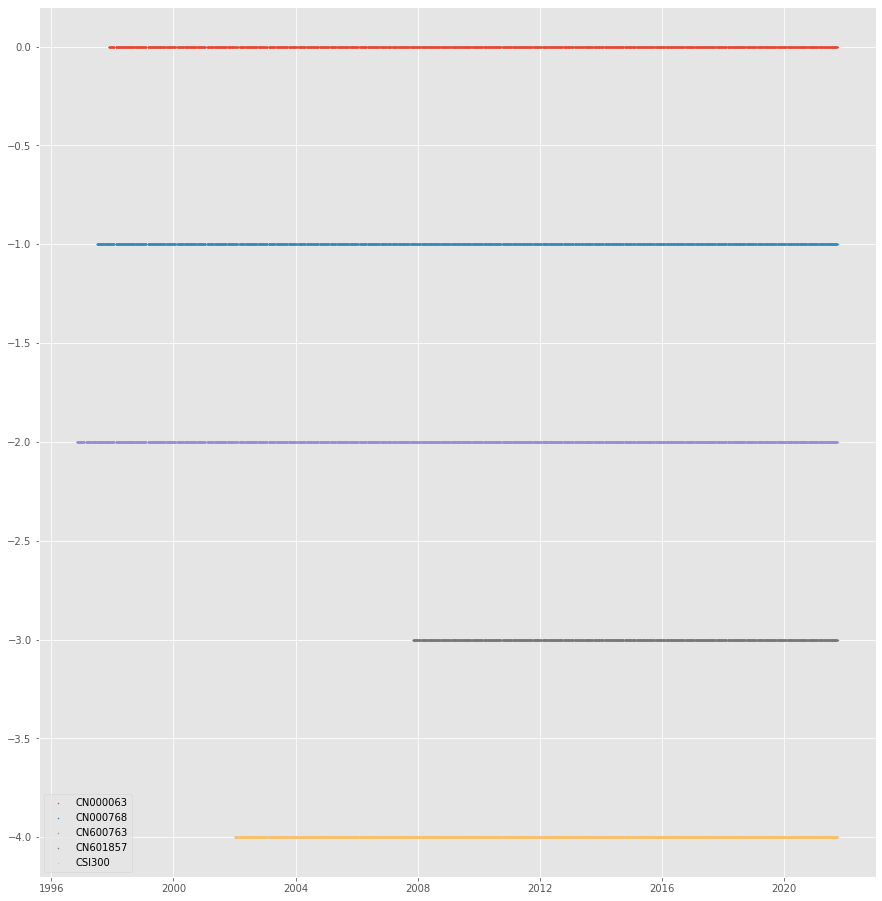

In [21]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs1):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

/home/andy/anaconda3/envs/ddpg/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


<AxesSubplot:xlabel='date'>

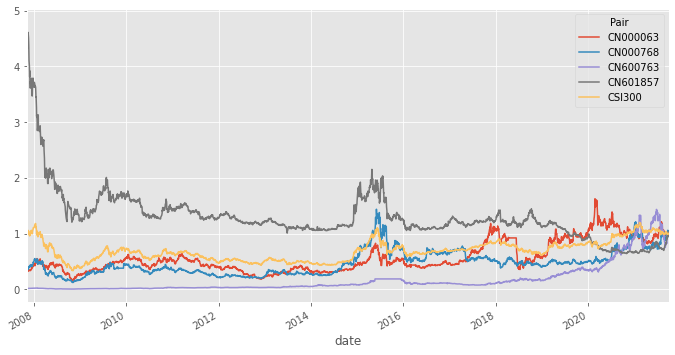

In [22]:
# View one day, normalized
data_window = df.copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Pair')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()

/home/andy/anaconda3/envs/ddpg/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


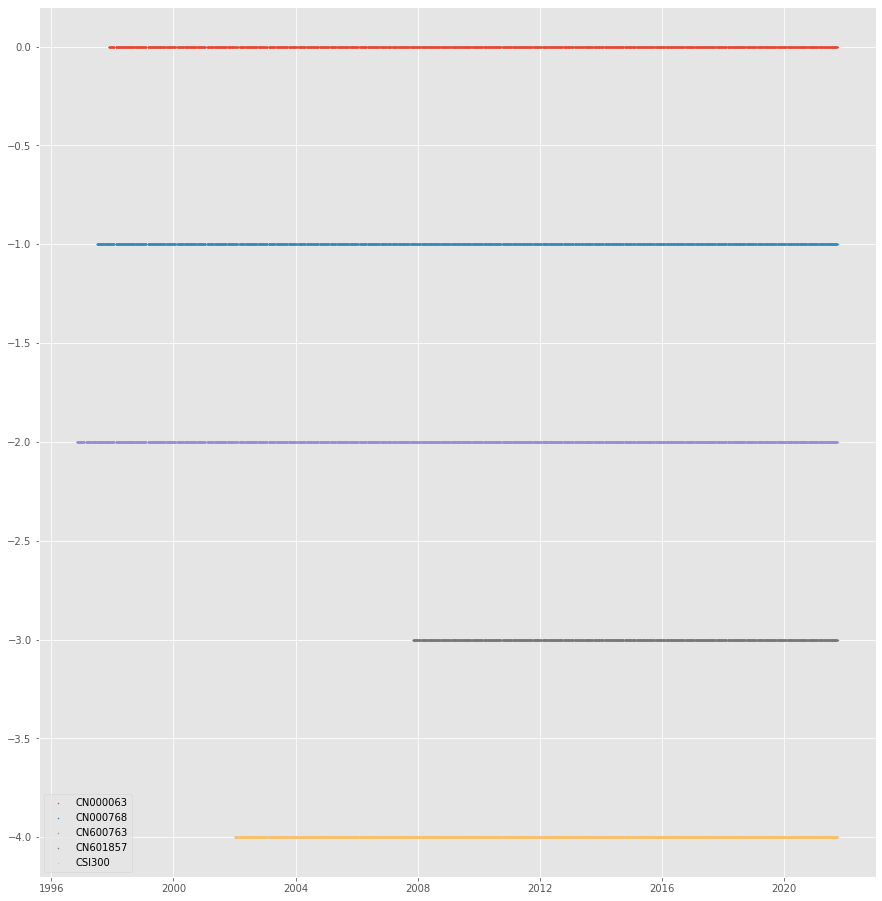

In [23]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()